<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Deep Learning</center>

# Worksheet S4: Redes Neuronales Convolucionales en Keras (CNNs)

## Objetivos

El objetivo de este worksheet es comprender las características principales de las redes convolucionales así como su implementación en Keras a través de un ejemplo de reconocimiento de objetos en imágenes.

El objetivo de nuestra red neuronal convolucional será identificar y clasificar objetos específicos dentro de una imagen. Los píxeles de la imagen serán nuestros datos de entrada y las etiquetas serán el tipo de objeto que queremos reconocer.

Como ya sabemos cómo funcionan las redes neuronales, podemos pasar directamente a analizar las particularidades de las redes convolucionales:
- Imagenes como dato de entrada
- Capa convolucional
- Capa de muestreo o pooling
- Arquitectura de una CNN


## Introducción

Las redes neuronales convolucionales están presentes en una gran cantidad de algoritmos del estado del arte en Machine Learning. Son un tipo de red neuronal en el que las neuronas corresponden a campos receptivos, de forma muy parecida a las neuronas en la corteza visual primaria de un cerebro humano. Desde un punto de vista técnico, son una variación de las redes neuronales profundas (perceptrón multicapa), donde las neuronas se aplican a matrices bidimensionales y algunas de sus neuronas comparten pesos entre sí (reduciendo así también el número de parámetros del modelo). Por este motivo, son tremendamente efectivas en tareas de visión artificial, como la clasificación y/o segmentación de imagenes o videos.

En la actualidad, las redes neuronales convolucionales pueden trabajar con arrays de 1D (señales o secuencias), 2D (imágenes) o 3D (video). Son el estado del arte en innumerables problemas como el reconocimiento de objetos o la transcripción de escritura manuscrita.

## Imagen como dato de entrada

Hasta ahora, hemos trabajado con datos de entrada de 1 o 2 dimensiones. Ahora vamos a empezar a trabajar con imágenes, que normalmente tienen 3 dimensiones:
- Longitud de la imagen.
- Altura de la imagen.
- Número de canales (colores).

La novedad ahora es el número de canales de color. Esto representa la profundidad de la imagen, como podemos ver en la imagen de abajo, y está relacionada con los colores que se utilizan. Normalmente, las imagenes a color están compuestas de los 3 canales rgb: red, green, blue. Por tanto, para cada píxel tenemos 3 valores numéricos en el rango 0 a 255 que se corresponden con la intensidad de cada uno de estos 3 colores. 

<img src="imageDepth.png" style="height: 400px">

## Red Neuronal Convolucional (CNN)

Cada red convolucional está formada por una o varias capas convolucionales. Estas capas son muy diferentes de las capas dense o perceptrón que hemos visto hasta ahora. Las capas convolucionales se diseñaron originalmente para encontrar patrones en imágenes con el objetivo de clasificar imágenes o partes de imágenes. Espera... las DNNs también estaban diseñadas para encontrar patrones en nuestros datos de entrada, ¿No?.

La diferencias fundamental es cómo abordan este problema. La red DNN busca patrones de forma global mientras que la red convolucional busca patrones de forma local. Cada neurona de la red DNN está conectada a toda la capa anterior y, por tanto, busca información de forma global. Las capas convolucionales no van a estar conectadas de esta forma, si no que van a buscar patrones en partes concretas de la capa anterior.

Vamos a ver un ejemplo: Supongamos que partiendo de esta imagen, nuestro objetivo es determinar si es una foto de un gato o no lo es.

<img src="coco.png" style="height: 600px">

**Red DNN:** Una red DNN consideraría la imagen completa. Recibiría todos los pixels columna a columna (o fila a fila) y utilizaría toda la información para generar la salida.

**Red CNN:** Una red convolucional puede mirar a partes específicas de la imagen. Imaginad que la red analizase las partes señaladas en la imagen de abajo para detectar patrones.

<img src="coco2.png" style="height: 600px">


## Partes de una Red Neuronal Convolucional

A continuación vamos a desgranar las distintas partes de una red neuronal convolucional para entender su funcionamiento.

En primer lugar, debemos saber que a lo que llamamos una capa de una CNN suele estar formado por dos sub-capas que son la sub-capa convolucional y la sub-capa de pooling o subsampling.

### Capa convolucional

La capa convolucional puede entenderse como un extractor de características. Vamos a ver un ejemplo:

<img src="cnn_01.png" style="height: 400px">

#### Campo Receptivo (Receptive Field)

Cada capa convolucional va a examinar un campo receptivo, que es un tensor en 3 dimensiones (ancho, alto y profundidad). Lo bloques más utilizados son de 3x3 o 5x5 píxeles. Una red CNN toma un campo receptivo como entrada y devuelve un mapa de características (feature map) que representa la presencia o no de ciertos filtros específicos en el campo receptivo.

#### Filtro y Mapa de Características (Filter and Feature Map)

Un filtro es un patrón de m x n pixels que buscamos en una imagen. El número de filtros en una red convolucional representa el número de patrones que vamos a buscar y, por tanto, la profundidad de nuestro mapa de características. Si tenemos una capa convolucional con 32 filtros, buscaremos 32 filtros o patrones diferentes y tendremos un mapa de características de profundidad 32. Cada una de las capas será una matriz que contiene valores que indican la presencia o no del filtro que buscamos en dicha posición.

Esto se ve muy bien en la siguiente ilustración del libro "Deep Learning with Python" de Francois Chollet:

<img src="filter.png" style="height: 400px">

Por tanto, la matriz de pesos contiene todos los filtros que deberemos aplicar.

Suponiendo que nuestra capa convolucional tiene un sólo filtro, lo que hacemos es ir recorriendo nuestra imagen de entrada poco a poco (moviendo el filtro), de forma que el valor de la activación de cada unidad de nuestro mapa de caraterísticas (_feature map_) se extraerá mediante la aplicación de una función no lineal a la convolución de nuestro campo receptivo con nuestro filtro (pesos), produciendo un solo valor en el mapa de características por cada sub-región de la imagen de entrada a la que aplicamos el filtro.

Como vemos en las imagenes siguientes, lo que vamos haciendo es simplemente mover este campo receptivo poco a poco por toda la imagen de entrada hasta que la hemos recorrido por completo, obteniendo un mapa de características.

<img src="cnn_02.png" style="height: 400px">
<img src="cnn_03.png" style="height: 400px">

Como decíamos, nuestra sub-capa convolucional tendrá varios filtros, por lo que este proceso se repite para cada uno de ellos, obteniendo así varios mapas de características, y extrayendo por tanto distintas características de la imagen de entrada.

<img src="cnn_04.png" style="height: 400px">

#### Bordes y Padding

Al deslizar un filtro de tamaño m x n por la imagen de entrada tenemos que decidir qué hacemos con los bordes de la misma. Una opción es empezar por el borde de arriba a la izquierda observando los primeros m x n píxeles, pero al recorrer la imagen de esta forma obtendremos un mapa de características más pequeño que la imagen original.

En ocasiones, esto no es lo que buscamos y en estos casos se utiliza el padding. Básicamente, lo que hacemos es comenzar el análisis como si hubiese bordes imaginarios en la imagen que se rellenaran con ceros o replicando el pixel real más cercano.

<img src="padding.png" style="height: 400px">

#### Strides

Hasta ahora, hemos considerado que los filtros vamos a moverlos de forma continua y de píxel en píxel. Sin embargo, muchas veces moveremos los filtros de 2 en 2 píxeles o más. El tamaño de stride representa cuantas filas o columnas movemos el filtro cada vez, es decir, el tamaño del paso de este movimiento.

### Capa de agrupación (pooling)

A cada capa convolucional le suele seguir una capa _pooling_, que se encarga de reducir la dimensionalidad de la imagen (mapa de características) extraída por la capa convolucional. Esto se hace para reducir el tiempo de procesado necesario y para obtener cierta invariabilidad a pequeñas rotaciones o traslaciones. 

Por tanto, la capa de pooling realiza una operación de agrupamiento (o resumen) recorriendo poco a poco la imagen de entrada (que es la salida de la capa convolucional). De forma similar a lo que hacía la capa anterior, irá mirando a un campo receptivo y realizando una operación sencilla, que suele ser una media de todos los valores o una selección del máximo. Una posibilidad sería un campo receptivo de 2x2 pixels y función max, con esta configuración esta capa iría procesando la imagen de entrada en regiones de 2x2 y seleccionando el máximo de cada una de estas regiones.

<img src="cnn_05.png" style="height: 400px">


La arquitectura más típica de una red convolucional consiste en una serie de módulos convolucionales que actúan como extractor de características. Cada uno de estos módulos está formado por una capa convolucional seguido de una capa pooling. A continuación, se utiliza una o varias capas _fully-connected_ (perceptrón o _dense_), que realiza la clasificación final. En un problema de clasificación multiclase, la última capa será de tipo Dense y tendrá tantas neuronas como clases tenga el problema, y la función de activación para esta última capa de salida será de tipo _softmax_.

La función de activación softmax fuerza a que la suma de todas las salidas sea 1, de forma que las salidas puedan interpretarse como la probabilidad de la imagen de entrada de pertenecer a cada una de esas clases.

En la siguiente imagen podemos ver una posible estructura para un problema de reconocimiento de idioma, cuya entrada es un espectrograma (una representación en tiempo-frecuencia) y hay 8 posibles idiomas.

<img src="cnn_06.png" style="height: 400px">

## CNNs en Keras

Ahora vamos a ver cómo se definen estas capas en Keras. Para ello, como siempre, comenzamos importando los paquetes que vamos a necesitar, y los datos correspondientes a Fashion MNIST como en las sesiones anteriores.

Además, separaremos las primeras 10000 imágenes para validación como hicimos en sesiones previas, y extraeremos el número de clases de forma automática a partir de las etiquetas:

In [2]:
# %tensorflow_version 2.x  # sólo es necesaria en colab
import tensorflow as tf
import numpy as np
np.random.seed(123)  # for reproducibility

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow import keras


# Import Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

n_classes = len(np.unique(Y_train))

Y_train = keras.utils.to_categorical(Y_train, n_classes)
Y_valid = keras.utils.to_categorical(Y_valid, n_classes)
Y_test = keras.utils.to_categorical(Y_test, n_classes)

A continuación vamos a ver cada una de las capas que formarán nuestra CNN:

### Capa de entrada

En primer lugar, necesitamos modificar el formato de entrada de los datos, ya que las capas convolucionales esperan tensores de 3 dimensiones:  ancho x alto x #canales.

Estos tensores serán transformados a 4 dimensiones, añadiendo el número de muestras como primera dimensión en tiempo de ejecución (dependiendo del tamaño del mini-batch). Nuestros conjuntos de datos tendrán como primera dimensión el número de ejemplos o muestras de cada uno de nuestros subconjuntos definidos (train: 50000, valid: 10000, test: 10000).

Como nuestras imágenes son de tamaño 28x28 píxeles en escala de grises (monocromáticas) el número de canales será 1.

In [3]:
# Reshape input to [width, height, #channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)

(50000, 28, 28, 1)


### Convolucional

Utilizaremos la capa Conv2D de Keras para crear una capa convolucional para entradas de 2 dimensiones. 

Recibe como entrada (entre otros):
- filters, que es el número de filtros que se va a utilizar (número de _feature maps_).
- kernel\_size, que es el tamaño de los filtros.
- strides, que es el paso que se va a utilizar entre campo receptivo y campo receptivo.
- padding, que es para el relleno a la entrada, nosotros utilizaremos 'same'.
- activation, que es la función (transformación) que se va a aplicar después de la convolución.

Por tanto, definimos nuestro modelo secuencial y la capa de entrada:

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


Conv2D transformará nuestro tensor en 4 dimensiones añadiendo el número de muestras del batch, y la salida será otro tensor de 4 dimensiones.

### Pooling

Utilizaremos la capa MaxPooling2D. Esta capa escoge el máximo de los valores del campo receptivo que le indiquemos. En nuestro caso utilizaremos, por ejemplo un filtro de tamaño 2x2 con un paso entre muestreos de 2.

MaxPooling2D(self, pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)

Recibe como entrada (entre otros):
- pool\_size, que es el tamaño del campo receptivo.
- strides, que es el paso al hacer el barrido de la imagen de entrada
- padding, que es para el relleno a la entrada, nosotros utilizaremos 'same'.


In [5]:
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


Como vemos, esta capa no tiene parámetros entrenables.


### Dense

Finalmente, utilizaremos una capa de tipo Dense. Para ello primero vamos a convertir nuestra imagen 2D (la salida de la capa de pooling anterior) en un vector, para ello utilizaremos la capa Flatten.

A continuacion utilizamos la capa Dense, que recibe como entrada el número de unidades y la función de activación, la salida será del tamaño del número de unidades.

In [6]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
Total params: 803,264
Trainable params: 803,264
Non-trainable params: 0
_________________________________________________________________


### Capa de salida

Finalmente, necesitamos una capa de salida, que será de tipo Dense y tendrá tantas neuronas como clases tiene nuestro problema.

La función de activación será de tipo softmax, de esta forma la salida pueda interpretarse como probabilidades de pertenecer a cada una de las clases.


In [7]:
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________


### Compilación, entrenamiento y evaluación del modelo:

Una vez que hemos definido el modelo, como en las sesiones anteriores, el siguiente paso es compilarlo. Para ello, utilizamos la función de coste de entropía cruzada y el optimizador Adam, además de especificar la probabilidad de acierto como la métrica que utilizaremos para visualización del rendimiento en tiempo de entrenamiento.

Tras esto, indicamos a la función de entrenamiento _fit_ que queremos entrenar con los datos de X\_train y sus etiquetas Y\_train, con un tamaño de batch (ejemplo, 128), durante un número dado de épocas (por ejemplo, 5) y le añadimos nuestro conjunto de validación (X\_valid, Y\_valid), para que nos muestre el rendimiento en dicho conjunto al finalizar cada época.

Al finalizar el entrenamiento, comprobamos su rendimiento sobre los datos de test con la función _evaluate_.

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=5, 
          verbose=1, validation_data=[X_valid, Y_valid])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)


Epoch 1/5
390/391 [============================>.] - ETA: 0s - loss: 4.3759 - accuracy: 0.7869

ValueError: in user code:

    /opt/anaconda3/envs/mioti_nlp/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1323 test_function  *
        return step_function(self, iterator)
    /opt/anaconda3/envs/mioti_nlp/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/envs/mioti_nlp/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/mioti_nlp/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/mioti_nlp/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/mioti_nlp/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1307 run_step  **
        outputs = model.test_step(data)
    /opt/anaconda3/envs/mioti_nlp/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1266 test_step
        y_pred = self(x, training=False)
    /opt/anaconda3/envs/mioti_nlp/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/anaconda3/envs/mioti_nlp/lib/python3.9/site-packages/tensorflow/python/keras/engine/input_spec.py:200 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 28, 28, 1) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1' shape=(None, 10) dtype=float32>]


### Visualización del entrenamiento

Otra de las utilidades que nos ofrece Keras es la posibilidad de acceder al histórico del entrenamiento de un modelo para poder ver las curvas de entrenamiento.

Para acceder a este histórico, tan sólo tenemos que guardar la salida de la llamada a model.fit.

El código de una función para imprimir las curvas de aprendizaje por pantalla se muestra a continuación.

Ejecútalo y contesta las preguntas de la siguiente celda para el primer modelo y el segundo (una o dos capas convolucionales +  maxpooling).

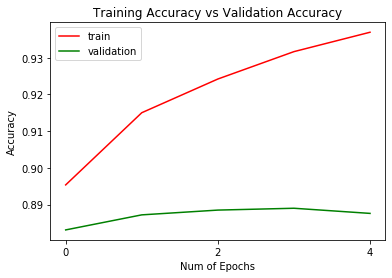

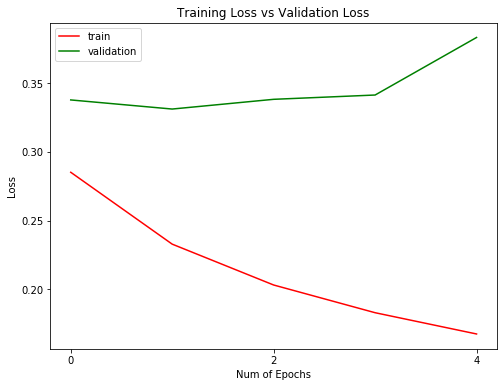

In [13]:
############## Si al ejecutar el Kernel se bloquea, 
############## utiliza estas líneas para permitir la 
############## duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
##############

import matplotlib.pyplot as plt



def plotCurves(history,epochs):

    plt.figure(0)
    plt.plot(history.history['accuracy'],'r')
    plt.plot(history.history['val_accuracy'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['train','validation'])
 
 
    plt.figure(1)
    plt.plot(history.history['loss'],'r')
    plt.plot(history.history['val_loss'],'g')
    plt.xticks(np.arange(0, epochs, 2.0))
    plt.rcParams['figure.figsize'] = (8, 6)
    plt.xlabel("Num of Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.legend(['train','validation'])
 
 
    plt.show()
    
plotCurves(history,5)

## Resumen del código utilizado

A modo de resumen, se muestra a continuación el código que se ha utilizado, aunque se ha añadido otra capa convolucional para que lo tengáis de ejemplo.

In [8]:
# %tensorflow_version 2.x  # sólo es necesaria en colab
import tensorflow as tf
import numpy as np
np.random.seed(123)  # for reproducibility

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow import keras


# Import Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

n_classes = len(np.unique(Y_train))

# Reshape input to [width, height, #channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.to_categorical(Y_train, n_classes)
Y_valid = keras.utils.to_categorical(Y_valid, n_classes)
Y_test = keras.utils.to_categorical(Y_test, n_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', input_shape=(28,28,1)))
#model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=128, epochs=5, 
          verbose=1, validation_data=[X_valid, Y_valid])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 202,442
Trainable params: 202,442
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 20s 391

## Minireto

Ahora os toca a vosotros:

Jugad con el número de capas y la configuración de la red neuronal para mejorar el resultado conseguido.

¿Se os ocurre alguna otra forma de mejorar el resultado con lo que hemos visto hasta ahora?